In [58]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [59]:
df = pd.read_csv('HR_comma_sep.csv')

In [132]:
df.shape

(14995, 10)

In [61]:
X = df.drop('left', axis=1)
y = df['left']

In [62]:
# le = LabelEncoder()
# X['Department'] = le.fit_transform(X['Department'])
# X['salary'] = le.fit_transform(X['salary'])
X_ohe = pd.get_dummies(X)


In [74]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X_ohe,y,test_size=0.2,random_state=24, stratify=df['left'])

In [138]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np

n_neighbour = [1,2,3,4,5,6,7,8,9,10]
scores = []

for i in n_neighbour:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    y_pred = knn.predict(X_test)
    scores.append(f1_score(Y_test, y_pred, pos_label=0))


i_max = np.argmax(scores)
print('Index of Maximun accuracy Score', n_neighbour[i_max])
print('Best accuracy score', scores[i_max])

scores

Index of Maximun accuracy Score 2
Best accuracy score 0.9696969696969697


[0.967369589345172,
 0.9696969696969697,
 0.9642619311875694,
 0.9640350877192982,
 0.9569462938304483,
 0.961546912766425,
 0.9583148558758315,
 0.960529217199559,
 0.960497114957834,
 0.9640097151689114]

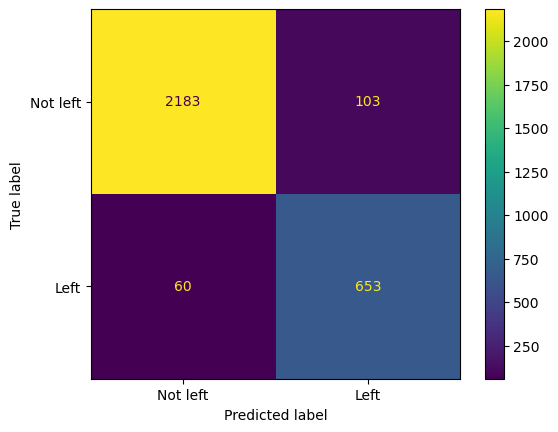

In [139]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, recall_score, precision_score,f1_score,classification_report

cm = confusion_matrix(Y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=['Not left', 'Left'])
disp.plot()


In [140]:
#Recall score
print(recall_score(Y_test, y_pred, pos_label=1))   #Recall score for Left = 1
print(recall_score(Y_test, y_pred, pos_label=0))   #Recall score for Left = 0

0.9158485273492286
0.9549431321084865


In [122]:
#Precision Score
print(precision_score(Y_test, y_pred, pos_label=1))   #Recall score for Left = 1
print(precision_score(Y_test, y_pred, pos_label=0))  

0.8637566137566137
0.9732501114578689


In [127]:
# F1 Score
print(f1_score(Y_test, y_pred, pos_label=1))  
print(f1_score(Y_test, y_pred, pos_label=0)) 

0.8890401633764465
0.9640097151689114


In [129]:
# Classification Report
print(classification_report(Y_test, y_pred))  


              precision    recall  f1-score   support

           0       0.97      0.95      0.96      2286
           1       0.86      0.92      0.89       713

    accuracy                           0.95      2999
   macro avg       0.92      0.94      0.93      2999
weighted avg       0.95      0.95      0.95      2999



best k with criterion of f1-score (left)